# To do
1. 미분 값 threshold 정해야함 (trial and error)
2. 매 0.1초마다 textdata 받아서 읽음 (while & time으로) -> 12개에 대해서 미분값 계산 
3. 미분값 > threshold -> 해당 index -5 부터 index + 59 까지의 signal을 eyeblink detection model에 predict
4. eyeblink면 pass, eyeblink 아니면 해당 signal reg model에 predict -> output

- pipeline으로 자동화

In [4]:
import threading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential,Model
from sklearn.model_selection import train_test_split
from tensorflow import keras
import os
import time
import pickle
import tensorflow_addons as tfa

In [5]:
reg_model = keras.models.load_model('reg.h5')

In [125]:
class RealTime():
    def __init__(self, file_path):
        self.file_path = file_path
        self.result =[]

    def loop_(self):
        file = open(self.file_path, 'r')
        file = pd.read_csv(file, sep='\t', header=None)
        self.file = np.array([file[1].values]).T

    def diff(self, threshold=0.0017): # threshold 0.0015 -> 0.005
        valid_data = self.file
        diff1 = (valid_data[1:] - valid_data[:-1])
        diff = abs(diff1)
        result = []
        idx = np.where(diff > threshold)[0]
        print(idx)
        for j,i in reversed(list(enumerate(idx))):
            if len(valid_data[i:,0]) > 44 and (idx[j] - idx[j-1]) > 200: # slicing 모호함(7개보다 연속적인 경우가 많음 그리고 
                                                                            #threshold 값 만으로 실시간으로 inex를 검출하는게 난해함)
                result.append(valid_data[i-20:i + 44])
                break
            else:
                pass

        self.result = np.array(result)
        print(i)
        print(self.result)
        
    def predict(self):
        result = self.result.reshape(1,1, 64)
        pred1 = reg_model(result) * 3 # output shape = (1,2)
            
        return pred1.numpy()[0]

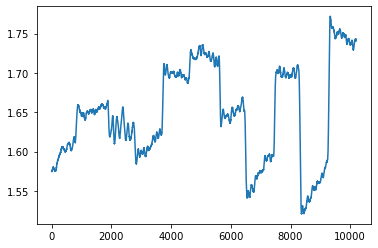

[2797 3707 3710 3711 3712 3713 3714 3715 3716 3717 3718 3719 3720 3721
 3722 3723 3724 3725 3726 3727 3728 3729 3731 3732 3734 3748 5619 5622
 5623 5624 5625 5626 5627 5628 5629 5630 5631 5632 5633 5634 5635 5636
 5637 5638 5639 5640 5641 5642 5643 5644 5645 5646 5647 5649 5652 5998
 6483 6484 6485 6486 6487 6488 6489 6491 6492 6493 6494 6495 6496 6497
 6499 6500 6501 6502 6503 6504 6505 6506 6507 6508 6509 6510 6511 6513
 6516 7448 7454 7455 7456 7457 7458 7459 7460 7461 7462 7463 7464 7465
 7466 7467 7468 7469 7470 7471 7472 7473 7474 7475 7476 7477 7478 7479
 7480 7481 7482 7498 8295 8296 8297 8299 8300 8301 8302 8303 8304 8305
 8306 8307 8308 8309 8310 8311 8312 8313 8314 8315 8316 8317 8318 8319
 8320 8321 8322 8323 8324 8325 8326 8327 8328 8329 8330 8331 8332 8333
 8334 8335 8336 8337 8338 8339 8340 8341 8342 8343 8344 8345 8346 8347
 8548 9248 9257 9260 9261 9262 9263 9264 9265 9266 9267 9268 9269 9270
 9271 9272 9273 9274 9275 9276 9277 9278 9279 9280 9281 9282 9283 9284
 9285 

In [127]:
loop =1
while (loop!=0):
    rt = RealTime('randomdata/(1, -1, 2, -3 ,-5).txt')
    rt.loop_()
    X = np.array(rt.file)
    plt.plot(X)
    plt.show()
    rt.diff()
    #if len(rt.result) > 30:
    pred = rt.predict()
    print(pred)
    #break
    
    loop-=1